In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import date

In [2]:
train_df = pd.read_csv('train_aWnotuB.csv') 
test_df = pd.read_csv('datasets_8494_11879_test_BdBKkAj.csv')

In [3]:
train_df['DateTime'] = pd.to_datetime(train_df['DateTime'])
test_df['DateTime'] = pd.to_datetime(test_df['DateTime'])

In [4]:
def extract_features(df):
    df['Year'] = df['DateTime'].dt.year
    df['Month'] = df['DateTime'].dt.month
    df['Day'] = df['DateTime'].dt.day
    df['Hour'] = df['DateTime'].dt.hour
    df['DayOfWeek'] = df['DateTime'].dt.dayofweek # Monday=0, Sunday=6
    df['is_weekend'] = df['DayOfWeek'].apply(lambda x: 1 if x >= 5 else 0)
    return df

train_df = extract_features(train_df)

In [5]:
indian_holidays = [
    date(2015, 11, 11), date(2015, 12, 25), 
    date(2016, 1, 26), date(2016, 8, 15), date(2016, 10, 30), date(2016, 12, 25),
    date(2017, 1, 26)
]
train_df['is_holiday'] = train_df['DateTime'].dt.date.apply(lambda x: 1 if x in indian_holidays else 0)

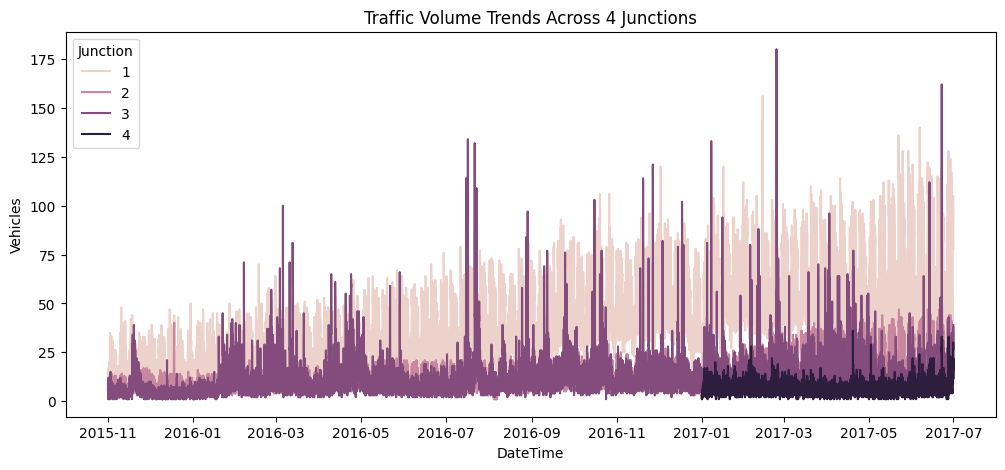

In [6]:
plt.figure(figsize=(12, 5))
sns.lineplot(data=train_df, x='DateTime', y='Vehicles', hue='Junction')
plt.title("Traffic Volume Trends Across 4 Junctions")
plt.show()


In [7]:
train_df = pd.get_dummies(train_df, columns=['Junction'], drop_first=True)
train_df.to_csv('project9_prepared_data.csv', index=False)
print("Week 3 Task Complete: Data Prepared and Saved.")

Week 3 Task Complete: Data Prepared and Saved.
